In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
# Load the data
df = pd.read_csv('data/sentiment-emotion-labelled_Dell_tweets.csv', header = 0)

In [10]:
df


,Unnamed: 0,Datetime,Tweet Id,Text,Username,sentiment,sentiment_score,emotion,emotion_score
0,0,2022-09-30 23:29:15+00:00,1575991191170342912,@Logitech @apple @Google @Microsoft @Dell @Len...,ManjuSreedaran,neutral,0.853283,anticipation,0.587121
1,1,2022-09-30 21:46:35+00:00,1575965354425131008,@MK_habit_addict @official_stier @MortalKombat...,MiKeMcDnet,neutral,0.519470,joy,0.886913
2,2,2022-09-30 21:18:02+00:00,1575958171423752203,"As @CRN celebrates its 40th anniversary, Bob F...",jfollett,positive,0.763791,joy,0.960347
3,3,2022-09-30 20:05:24+00:00,1575939891485032450,@dell your customer service is horrible especi...,daveccarr,negative,0.954023,anger,0.983203
4,4,2022-09-30 20:03:17+00:00,1575939359160750080,@zacokalo @Dell @DellCares @Dell give the man ...,heycamella,neutral,0.529170,anger,0.776124
...,...,...,...,...,...,...,...,...,...
24965,24965,2022-01-01 02:02:04+00:00,1477097760931336198,@ElDarkAngel2 @GamersNexus @Dell I wouldn't ev...,Eodart,negative,0.682981,anger,0.906309
24966,24966,2022-01-01 01:57:34+00:00,1477096631300415496,@kite_real @GamersNexus @Dell I didn't really ...,Eodart,positive,0.743940,joy,0.951701
24967,24967,2022-01-01 01:36:36+00:00,1477091355629432833,Hey @JoshTheFixer here it is....27 4K UHD USB-...,Corleone250,neutral,0.654463,anticipation,0.471185
24968,24968,2022-01-01 01:31:30+00:00,1477090070830141442,@bravadogaming @thewolfpena @Alienware @intel ...,MrTwistyyy,neutral,0.794049,anticipation,0.747014


In [11]:
# Derive Date from Datetime field to match the date level data for closing price of Dell's stock price and S&P 500
df['Date'] = pd.to_datetime(df['Datetime']).dt.strftime('%Y-%m-%d')




In [14]:
# Perform one hot encoding for categorical fields
sentiment_encoded = pd.get_dummies(df['sentiment'], prefix='sentiment')

emotion_encoded = pd.get_dummies(df['emotion'], prefix='emotion')

# Concatenate the one hot encoded columns with the original DataFrame
df = pd.concat([df, sentiment_encoded, emotion_encoded], axis=1)

In [15]:
# Count # of Words in Text field
df['word_count'] = df['Text'].apply(lambda x: len(str(x).split()))

                                                    Text  word_count
0      @Logitech @apple @Google @Microsoft @Dell @Len...          39
1      @MK_habit_addict @official_stier @MortalKombat...          31
2      As @CRN celebrates its 40th anniversary, Bob F...          34
3      @dell your customer service is horrible especi...          32
4      @zacokalo @Dell @DellCares @Dell give the man ...          11
...                                                  ...         ...
24965  @ElDarkAngel2 @GamersNexus @Dell I wouldn't ev...          50
24966  @kite_real @GamersNexus @Dell I didn't really ...          31
24967  Hey @JoshTheFixer here it is....27 4K UHD USB-...          11
24968  @bravadogaming @thewolfpena @Alienware @intel ...          31
24969  @rabia_ejaz @Dell Stopped buying windows lapto...          54

[24970 rows x 2 columns]


In [45]:
# Define colors for each sentiment, and Emotion category
sentiment_colors = {
    'positive': 'darkorange',
    'negative': 'slateblue',
    'neutral': 'grey'
}

array(['anticipation', 'joy', 'anger', 'sadness', 'fear', 'optimism',
       'disgust', 'surprise'], dtype=object)

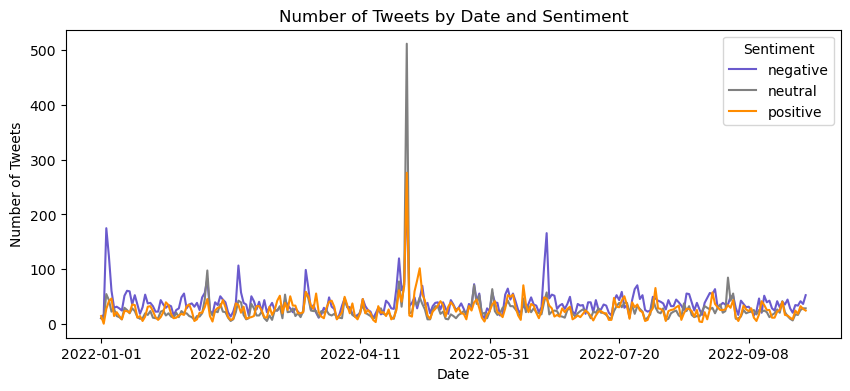

In [62]:
# Group by 'Date' and 'sentiment', count the number of tweets
grouped_data_sentiment = df.groupby(['Date', 'sentiment']).size().unstack(fill_value=0)

# Plot the line chart
grouped_data_sentiment.plot(kind='line', color=sentiment_colors,figsize=(10, 4))

# Add labels and title
plt.title('Number of Tweets by Date and Sentiment')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')

# Add legend
plt.legend(title='Sentiment')

# Show the plot
plt.show()


In [97]:
# Calculate z-scores for each date and sentiment category
z_scores_sentiment = (grouped_data_sentiment - grouped_data_sentiment.mean()) / grouped_data_sentiment.std()

# Identify dates with outstanding points (z-score > 3 or < -3)
outstanding_dates_sentiment = z_scores_sentiment[(z_scores_sentiment > 3) | (z_scores_sentiment < -3)].dropna(how='all')


outstanding_dates_sentiment.index

Index(['2022-01-03', '2022-01-04', '2022-04-26', '2022-04-29', '2022-05-04',
       '2022-06-22'],
      dtype='object', name='Date')

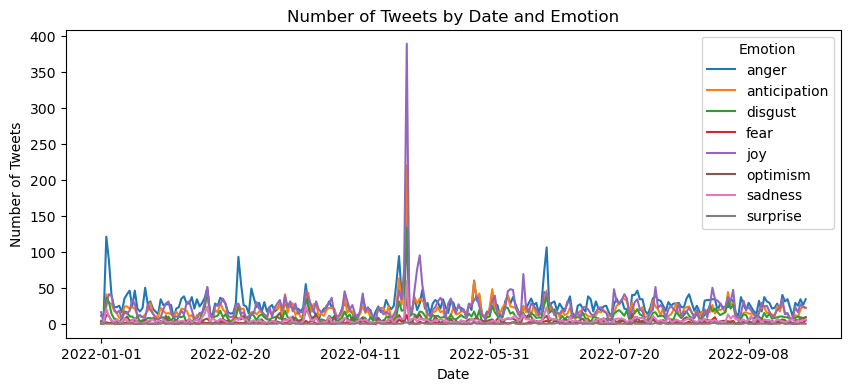

In [64]:
# Group by 'Date' and 'sentiment', count the number of tweets
grouped_data_emotion = df.groupby(['Date', 'emotion']).size().unstack(fill_value=0)

# Plot the line chart
grouped_data_emotion.plot(kind='line',figsize=(10, 4))

# Add labels and title
plt.title('Number of Tweets by Date and Emotion')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')

# Add legend
plt.legend(title='Emotion')

# Show the plot
plt.show()

In [95]:
# Calculate z-scores for each date and sentiment category
z_scores_emotion = (grouped_data_emotion - grouped_data_emotion.mean()) / grouped_data_emotion.std()

# Identify dates with outstanding points (z-score > 3 or < -3)
outstanding_dates_emotion = z_scores_emotion[(z_scores_emotion > 3) | (z_scores_emotion < -3)].dropna(how='all')

# Display dates
outstanding_dates_emotion.index

Index(['2022-01-03', '2022-01-04', '2022-02-11', '2022-02-23', '2022-03-21',
       '2022-03-22', '2022-04-26', '2022-04-29', '2022-06-09', '2022-06-22',
       '2022-07-25', '2022-08-02', '2022-08-25', '2022-08-26'],
      dtype='object', name='Date')

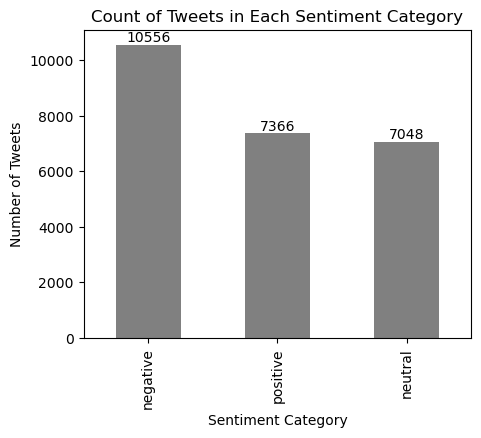

In [58]:
# Count the number of tweets in each sentiment category
sentiment_counts = df['sentiment'].value_counts()

# Plot the count of tweets in each sentiment category
plt.figure(figsize=(5, 4))
sentiment_counts.plot(kind='bar',color='grey')

# Add labels with numbers
for i, count in enumerate(sentiment_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Add labels and title
plt.title('Count of Tweets in Each Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Tweets')

# Show the plot
plt.show()

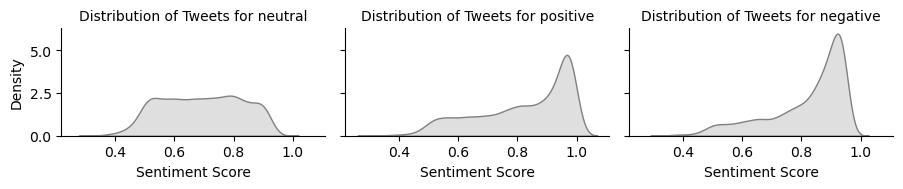

In [68]:
# Create a FacetGrid with sentiment category as the column variable
KDEs = sns.FacetGrid(df, col="sentiment", col_wrap=3, height=2, aspect=1.5)

# Map KDE plots onto the FacetGrid
KDEs.map(sns.kdeplot, "sentiment_score", fill=True, color='grey')

# Add labels and title to each plot
KDEs.set_titles("Distribution of Tweets for {col_name}")
KDEs.set_axis_labels("Sentiment Score", "Density")

# Show the plot
plt.show()

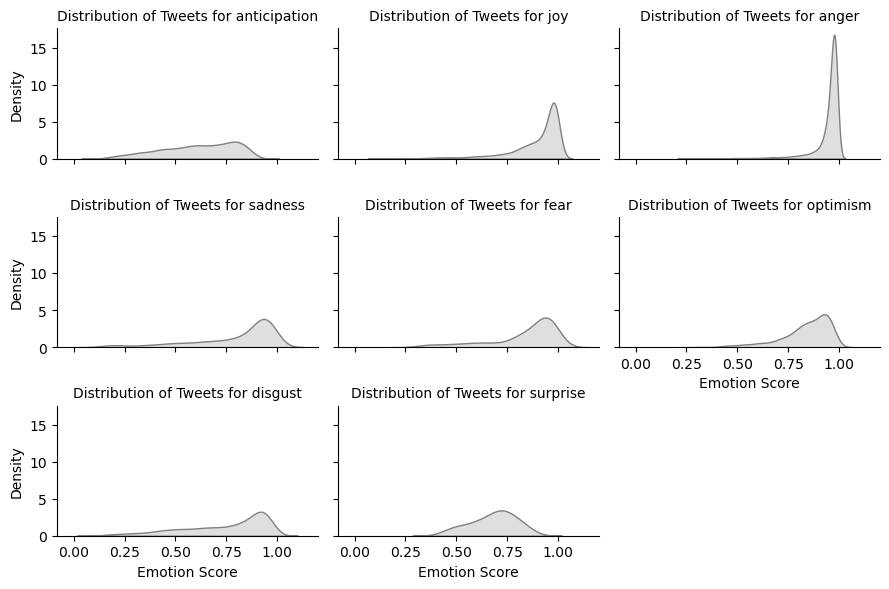

In [67]:
# Create a FacetGrid with sentiment category as the column variable
KDEe = sns.FacetGrid(df, col="emotion", col_wrap=3, height=2, aspect=1.5)

# Map KDE plots onto the FacetGrid
KDEe.map(sns.kdeplot, "emotion_score", fill=True, color='grey')

# Add labels and title to each plot
KDEe.set_titles("Distribution of Tweets for {col_name}")
KDEe.set_axis_labels("Emotion Score", "Density")

# Show the plot
plt.show()

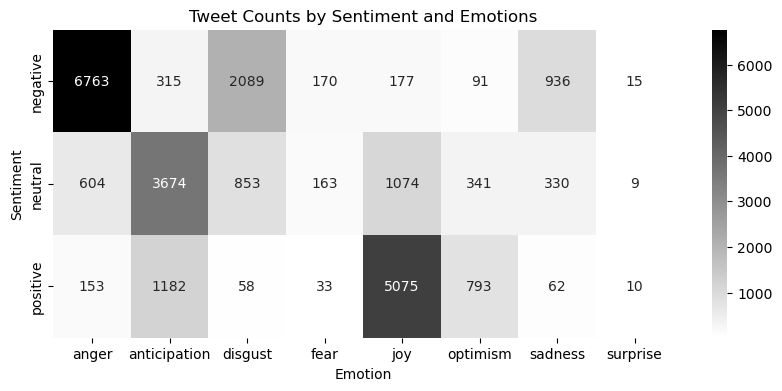

In [73]:
# Create a cross-tabulation table of sentiment and emotions
sentiment_emotion_ct = pd.crosstab(df['sentiment'], df['emotion'])

# Plot the heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(sentiment_emotion_ct, cmap='binary', annot=True, fmt='d')

# Add labels and title
plt.title('Tweet Counts by Sentiment and Emotions')
plt.xlabel('Emotion')
plt.ylabel('Sentiment')

# Show the plot
plt.show()

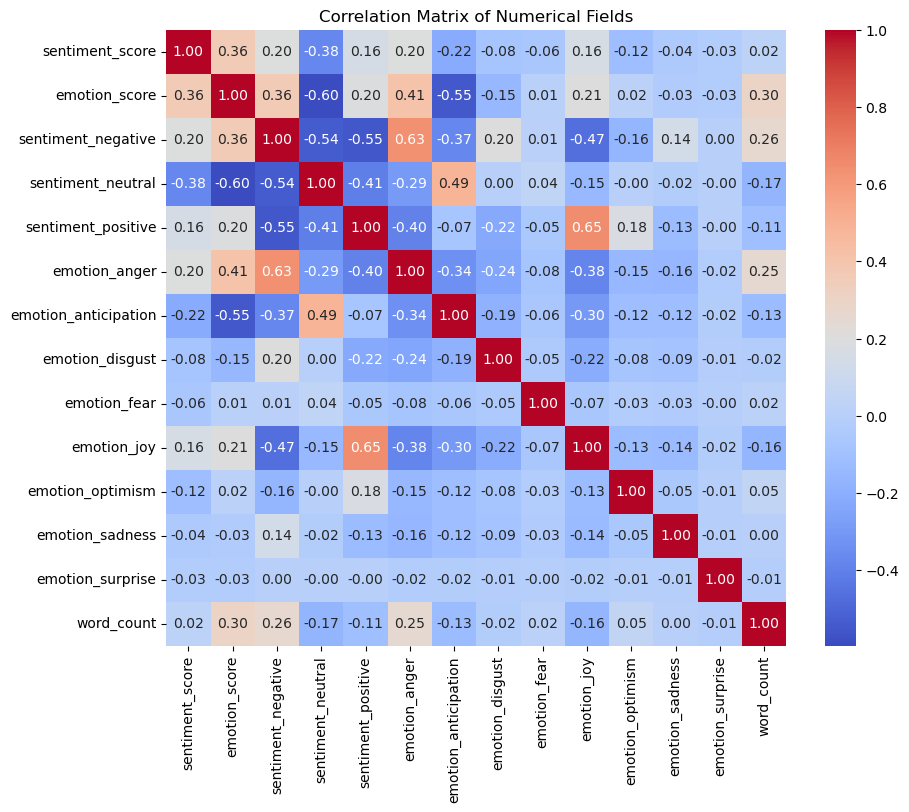

In [78]:
df.columns

Index(['Unnamed: 0', 'Datetime', 'Tweet Id', 'Text', 'Username', 'sentiment',
       'sentiment_score', 'emotion', 'emotion_score', 'Date',
       'sentiment_negative', 'sentiment_neutral', 'sentiment_positive',
       'emotion_anger', 'emotion_anticipation', 'emotion_disgust',
       'emotion_fear', 'emotion_joy', 'emotion_optimism', 'emotion_sadness',
       'emotion_surprise', 'word_count'],
      dtype='object')